<a href="https://colab.research.google.com/github/NehaChaudhari11/Data-Analytics/blob/main/People_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis**(**EDA**)

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/people (2).csv")

In [4]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
df.shape

(14999, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [11]:
df.duplicated().sum()

np.int64(3008)

In [12]:
df.drop_duplicates()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [13]:
df = df.rename(columns={
    'satisfactoryLevel':'satisfaction_level',
    'lastEvaluation':'last_evaluation',
    'numberOfProjects':'number_project',
    'avgMonthlyHours':'average_monthly_hours',
    'timeSpent.company':'time_spend_company',
    'workAccident':'work_accident',
    'promotionInLast5years':'promotion_last_5years',
    'dept':'department'
})

In [14]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

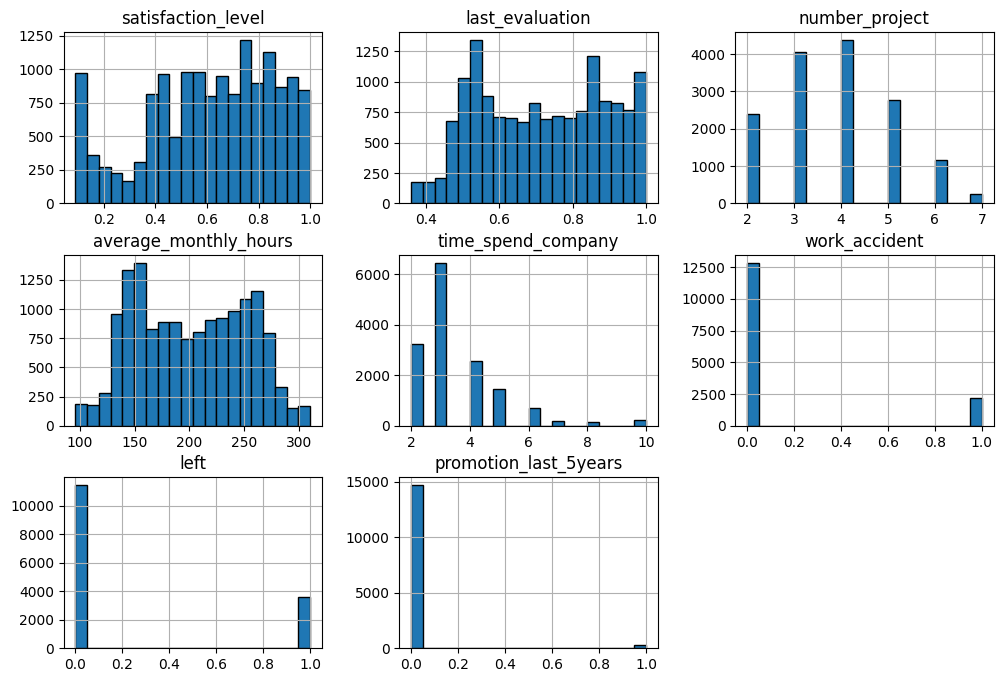

In [15]:
df.hist(figsize=(12,8), bins=20, edgecolor='black')
plt.show()


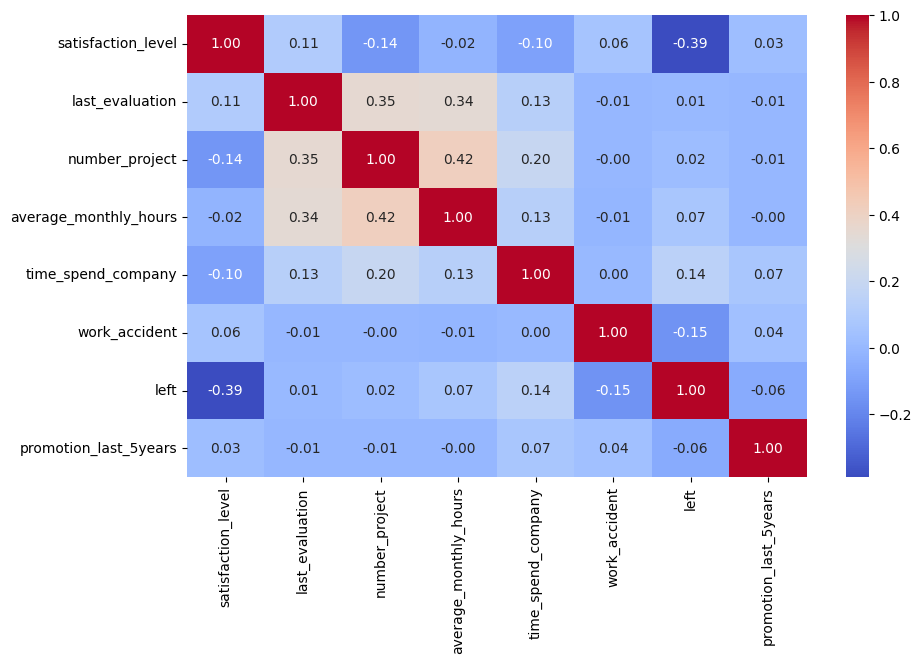

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Preprocesing**

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df[['satisfaction_level','last_evaluation','number_project','average_monthly_hours',
        'time_spend_company','work_accident','promotion_last_5years','salary','department']]
y = df['left']

num_cols = ['satisfaction_level','last_evaluation','number_project',
            'average_monthly_hours','time_spend_company','work_accident','promotion_last_5years']
cat_cols = ['salary','department']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42, stratify=y)

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans  = preprocessor.transform(X_test)

print("Transformed X_train shape:", X_train_trans.shape)
print("Transformed X_test shape:", X_test_trans.shape)

Transformed X_train shape: (11249, 18)
Transformed X_test shape: (3750, 18)


**Highest** **experienced employees**

In [26]:
high_exp = df['time_spend_company'].max()
print("Highest experience (years):", high_exp)
print(df[df['time_spend_company'] == high_exp])


Highest experience (years): 10
       satisfaction_level  last_evaluation  number_project  \
7383                 0.29             0.75               6   
7428                 0.75             0.60               4   
7429                 0.47             0.79               3   
7430                 0.22             0.70               2   
7431                 0.50             0.48               4   
...                   ...              ...             ...   
14795                0.69             0.88               3   
14830                0.96             0.60               3   
14912                0.41             0.67               6   
14926                0.91             0.64               3   
14993                0.61             0.89               3   

       average_monthly_hours  time_spend_company  work_accident  left  \
7383                     271                  10              0     0   
7428                     186                  10              1     0   
7429 

 **Highest experience department**-**wise**

In [27]:
print(df.groupby('department')['time_spend_company'].max())


department
IT             10
RandD           8
accounting     10
hr              8
management     10
marketing      10
product_mng    10
sales          10
support        10
technical      10
Name: time_spend_company, dtype: int64


**Highest salary department-wise**

In [28]:
print(df.groupby('department')['salary'].value_counts())

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64


**Satisfactory level department wise**

In [29]:
print(df.groupby('department')['satisfaction_level'].agg(['mean','min','max']))


                 mean   min  max
department                      
IT           0.618142  0.09  1.0
RandD        0.619822  0.09  1.0
accounting   0.582151  0.09  1.0
hr           0.598809  0.09  1.0
management   0.621349  0.09  1.0
marketing    0.618601  0.09  1.0
product_mng  0.619634  0.09  1.0
sales        0.614447  0.09  1.0
support      0.618300  0.09  1.0
technical    0.607897  0.09  1.0


**Department wise low salary**

In [30]:
print(df[df['salary']=='low'].groupby('department').size())

department
IT              609
RandD           364
accounting      358
hr              335
management      180
marketing       402
product_mng     451
sales          2099
support        1146
technical      1372
dtype: int64


**Department wise projects**

In [33]:
print(df.groupby('department')['number_project'].mean())

department
IT             3.816626
RandD          3.853875
accounting     3.825293
hr             3.654939
management     3.860317
marketing      3.687646
product_mng    3.807095
sales          3.776329
support        3.803948
technical      3.877941
Name: number_project, dtype: float64


**Department wise last evaluation**

In [34]:
print(df.groupby('department')['last_evaluation'].mean())


department
IT             0.716830
RandD          0.712122
accounting     0.717718
hr             0.708850
management     0.724000
marketing      0.715886
product_mng    0.714756
sales          0.709717
support        0.723109
technical      0.721099
Name: last_evaluation, dtype: float64


**Department wise left**

In [35]:
print(df.groupby('department')['left'].sum())


department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64


**Relationship  (Data Manipulation, Visualization)**

No. of projects vs Salary

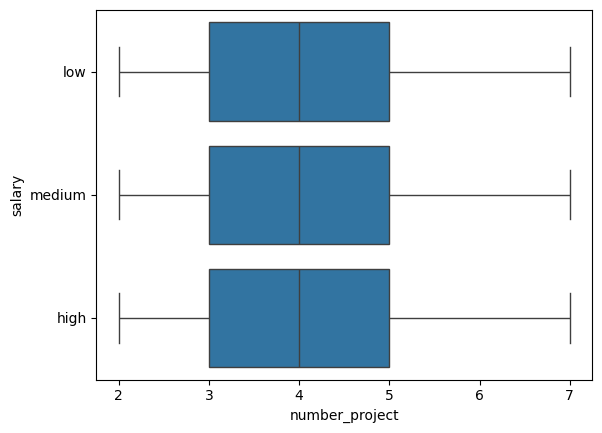

In [39]:
sns.boxplot(x='number_project',y='salary', data=df)
plt.show()

**No. of project vs left**


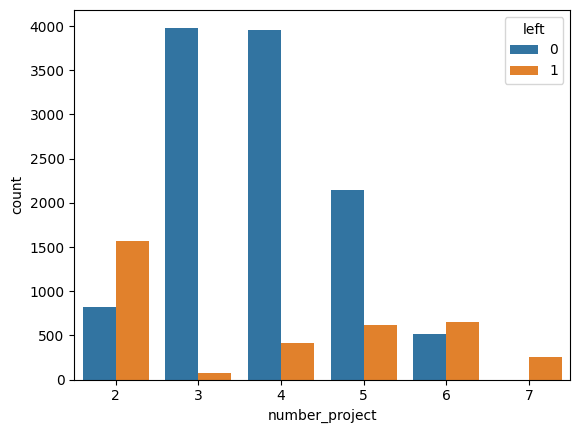

In [43]:
sns.countplot(x='number_project', hue='left', data=df)
plt.show()


Satisfactory level vs No. of Projects


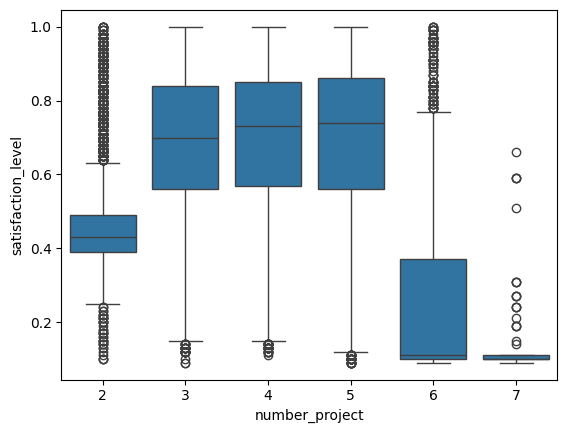

In [44]:
sns.boxplot(x='number_project', y='satisfaction_level', data=df)
plt.show()

Promotion vs salary


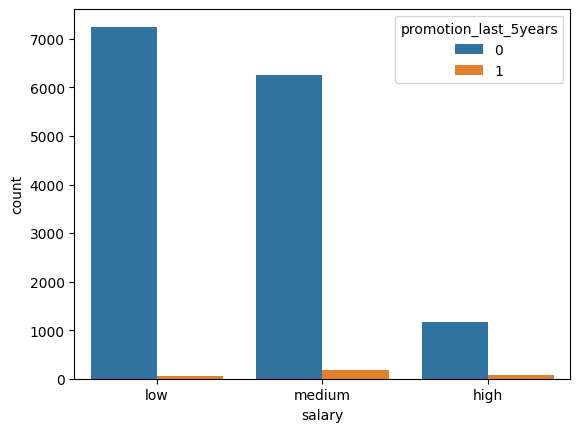

In [45]:
sns.countplot(x='salary', hue='promotion_last_5years', data=df)
plt.show()


Dept.vs salary



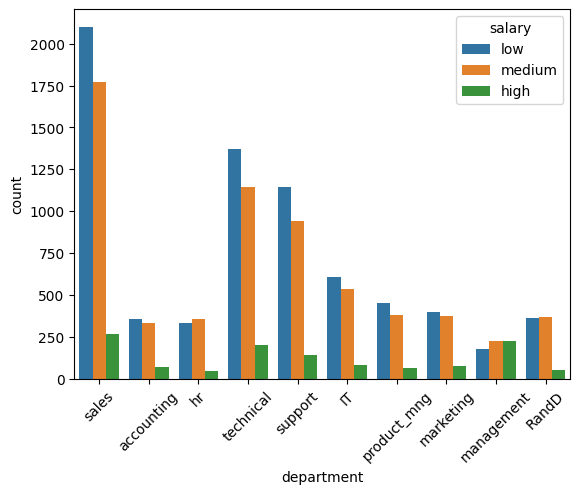

In [46]:
sns.countplot(x='department', hue='salary', data=df)
plt.xticks(rotation=45)
plt.show()


Avge Monthly Hours vs satisfactory level


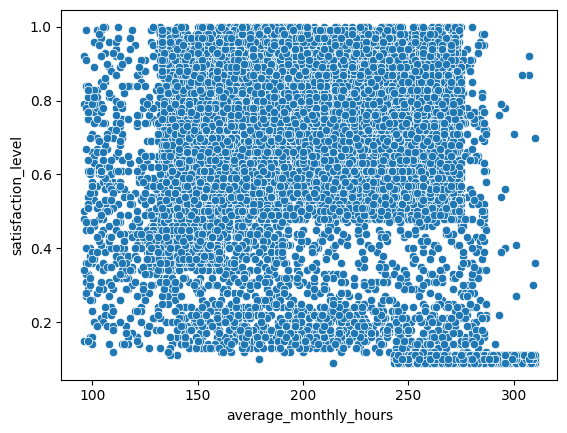

In [51]:
sns.scatterplot(x='average_monthly_hours', y='satisfaction_level', data=df)
plt.show()

Satisfactory level vs left


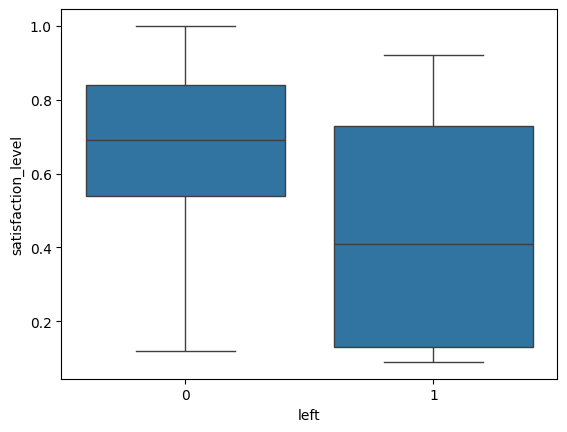

In [52]:
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.show()

Satisfactory level vs salary



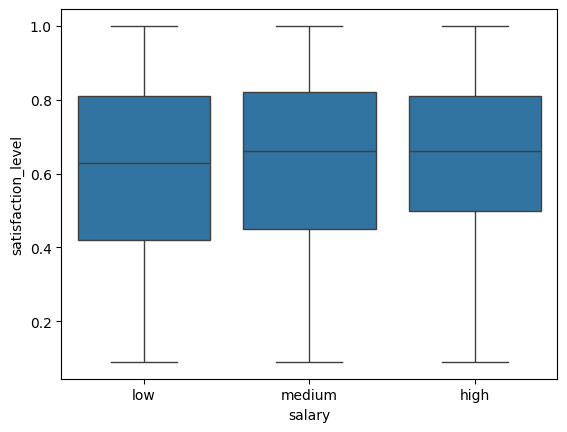

In [53]:
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.show()

Promotion vs left

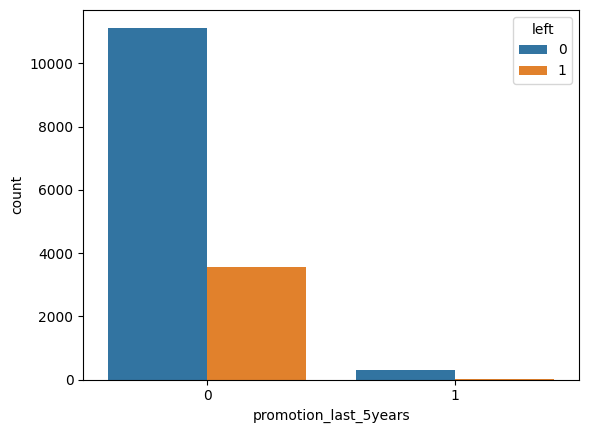

In [54]:
sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.show()


	No. of Project vs Promotion in 5 Years


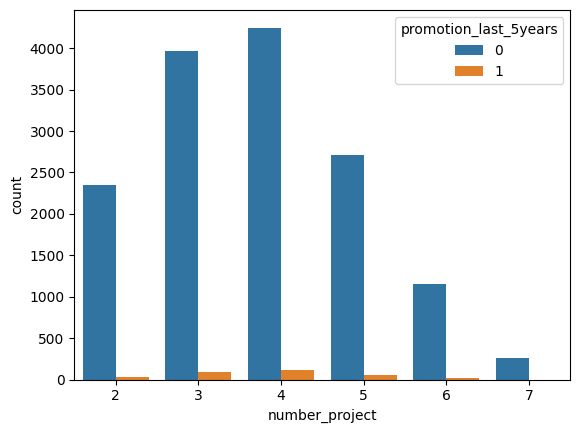

In [55]:
sns.countplot(x='number_project', hue='promotion_last_5years', data=df)
plt.show()


Left vs salary



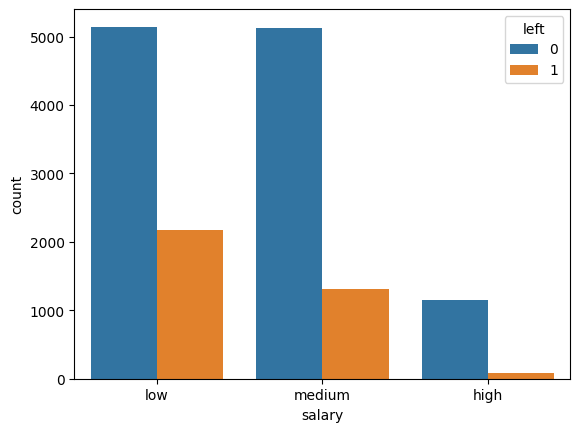

In [56]:
sns.countplot(x='salary', hue='left', data=df)
plt.show()

Work accident vs left



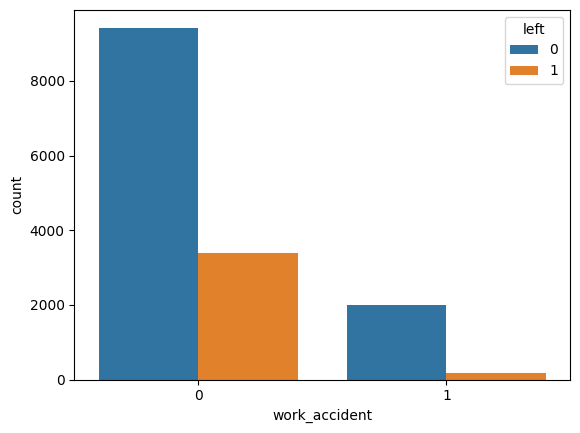

In [57]:
sns.countplot(x='work_accident', hue='left', data=df)
plt.show()


Avge Monthly Hours vs salary


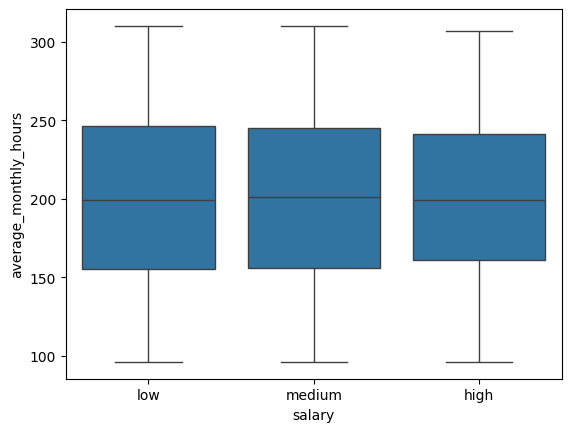

In [58]:
sns.boxplot(x='salary', y='average_monthly_hours', data=df)
plt.show()

	Encoding and standardizing(before and after split)


In [65]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_encoded, y, test_size=0.25, random_state=42, stratify=y)

print("Approach A (Before Split) Shapes:", X_train_a.shape, X_test_a.shape)

Approach A (Before Split) Shapes: (11249, 18) (3750, 18)


In [59]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

In [62]:
X_train_b = preprocessor.fit_transform(X_train_b)
X_test_b  = preprocessor.transform(X_test_b)

print("Approach B (After Split) Shapes:", X_train_b.shape, X_test_b.shape)

Approach B (After Split) Shapes: (11249, 18) (3750, 18)


Choose appropriate variables in x and y


In [69]:
y = df['left']
X = df[['satisfaction_level','last_evaluation','number_project',
        'average_monthly_hours','time_spend_company',
        'work_accident','promotion_last_5years',
        'salary','department']]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Features used:", X.columns.tolist())

X shape: (14999, 9)
y shape: (14999,)
Features used: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'salary', 'department']


Use 75% for training and 25% testing



In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (11249, 9) (11249,)
Testing set size: (3750, 9) (3750,)


Confusion matrix


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(X_train_trans, y_train)
y_pred = model.predict(X_test_trans)


Confusion matrix

In [74]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2628  229]
 [ 575  318]]


Classification Report

In [75]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2857
           1       0.58      0.36      0.44       893

    accuracy                           0.79      3750
   macro avg       0.70      0.64      0.65      3750
weighted avg       0.76      0.79      0.77      3750



Acurracy Score

In [76]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Accuracy Score: 0.7856
